In [1]:
!pip freeze | findstr qiskit

qiskit==1.3.1
qiskit-aer==0.15.1
qiskit-algorithms==0.3.1
qiskit-experiments==0.8.1
qiskit-ibm-experiment==0.4.8
qiskit-ibm-provider==0.11.0
qiskit-ibm-runtime==0.34.0
qiskit-machine-learning==0.8.2


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
%matplotlib inline

## <b>Note :</b>
- The zero'th qubit is Alice's
- The First qubit is Bob's

In [3]:
# Creating an Entanglement Pair between Alice and Bob

def create_entanglment_ckt(q_ckt):
    # resource state
    q_ckt.h(0)
    q_ckt.cx(0,1)
    q_ckt.barrier()
    return q_ckt

In [4]:
# Encoding the Classical Bit in the Alice's Qubits

def create_encoding_ckt(q_ckt, data):
    if data == "00":
        q_ckt.id(0)
    elif data == "01":
        q_ckt.x(0)
    elif data == "10":
        q_ckt.z(0)
    elif data == "11":
        q_ckt.x(0)
        q_ckt.z(0)
        
    q_ckt.barrier()
    return q_ckt

In [5]:
# The Alice's Qubits is then shared with Bob and Bobs perform 
# decoding by applying inverse of the encoding circuit

def create_decoding_ckt(q_ckt):
    # decoding
    q_ckt.cx(0, 1)
    q_ckt.h(0)
    return q_ckt

In [6]:
# Performing Measurement

def measurement(q_ckt, q_reg, c_reg):
    # Measuremnet
    q_ckt.measure(q_reg, c_reg)
    return q_ckt

In [7]:
# Creating the Circuit

def create_circuit(data):
    accepted_data = ["00", "01", "10", "11"]
    if data not in accepted_data:
        raise ValueError(f"Invalid data: {data}. Accepted values are {accepted_data}")

    q_reg = QuantumRegister(2)
    c_reg = ClassicalRegister(2)
    q_ckt = QuantumCircuit(q_reg, c_reg)

    q_ckt = create_entanglment_ckt(q_ckt)
    q_ckt = create_encoding_ckt(q_ckt, data)
    q_ckt = create_decoding_ckt(q_ckt)
    q_ckt = measurement(q_ckt, q_reg, c_reg)
    return q_ckt

In [8]:
# Executing on AerSimulator

def execute(q_ckt):
    sim = AerSimulator()
    result = sim.run(q_ckt, shots=100).result()
    return result

In [9]:
# Plotting the Results

def plot_hist(results):
    counts = results.get_counts()
    data = []
    for key, value in counts.items():
        data.extend([key] * value)

    plt.hist(data, bins=len(counts), edgecolor='black', alpha=0.7)

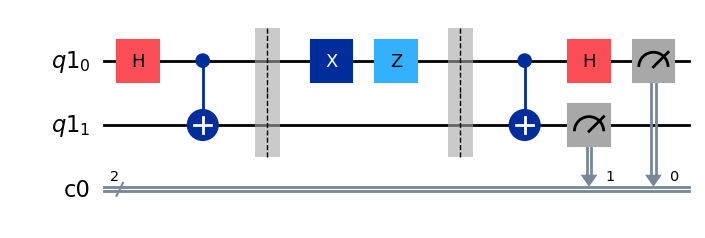

In [10]:
# Accepted input "00", "01", "10", "11"

if __name__ == "__main__":
    data = input()
    q_ckt = create_circuit(data)
    q_ckt.draw("mpl")
    results = execute(q_ckt)

# <b>Remember :</b>
- Qiskit follows little-endian convention, meaning qubit 0 is the least significant bit (LSB).
- As a result, measurement outcomes are stored in reverse order.
- If needed, reverse the bitstrings using counts.reverse_bits() or key[::-1].

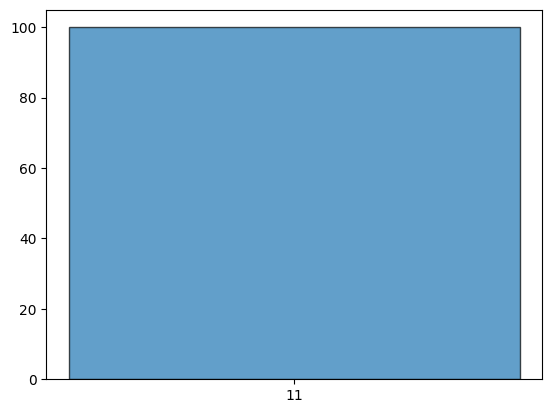

In [11]:
plot_hist(results)